# Python Visulization of SpringSaLaD Outputs

This notebook demonstrates different ways visualize the CSV outputs generate by SpringSaLaD.

In [1]:
#Import necessary functions and data
import Plotter
import pandas as pd
from data_locator import *
from display_info import *
from Average_z_pos import Average_z_pos

In [2]:
#Find the CSV data file

#Create the relative path to your desired SIMULATIONS directory
search_directory = os.path.join('Examples','R_L_test_difficult_SIMULATIONS','Simulation0_SIM_SIMULATIONS')
path = data_file_finder(search_directory, ['data'], 'BondCounts')

file_info(path, True)

Selected File:
Simulation0_SIM_AverageBondCounts_0_11.csv

Parent Directory:
Examples\R_L_test_difficult_SIMULATIONS\Simulation0_SIM_SIMULATIONS\Simulation0_SIM_FOLDER\data

Average Files:
BondCounts_0_0.csv                                  3.6 KB
BondCounts_0_11.csv                                 5.9 KB
MoleculeCounts_0_0.csv                              8.7 KB
MoleculeCounts_0_11.csv                             17.7 KB
SiteProperties_Adapter_Site_0_0_0.csv               6.6 KB
SiteProperties_Adapter_Site_0_0_11.csv              12.8 KB
SiteProperties_Adapter_Site_1_0_0.csv               5.6 KB
SiteProperties_Adapter_Site_1_0_11.csv              5.6 KB
SiteProperties_Adapter_Site_2_0_0.csv               6.6 KB
SiteProperties_Adapter_Site_2_0_11.csv              13.7 KB
SiteProperties_R_Site_0_0_0.csv                     7.6 KB
SiteProperties_R_Site_0_0_11.csv                    15.1 KB
SiteProperties_R_Site_1_0_0.csv                     5.6 KB
SiteProperties_R_Site_1_0_11.csv        

In [3]:
column_info(path)

Columns:
1:  BindingReaction0

List of indicies:
[1]


Examples\R_L_test_difficult_SIMULATIONS\Simulation0_SIM_SIMULATIONS\Simulation0_SIM_FOLDER\data/pyStat


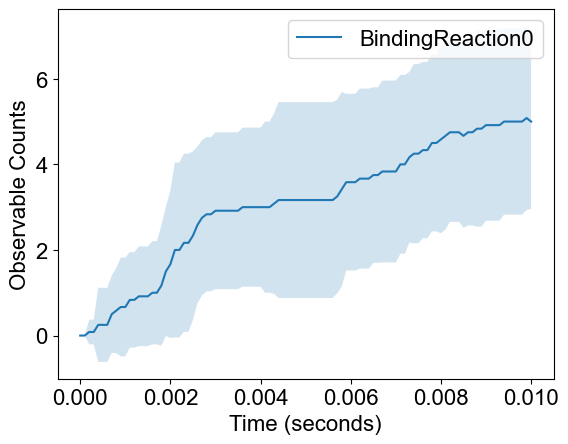

In [4]:
#Plot data for a specific molecule
Plotter.stdevPlots(path)

Columns:
1:  Free
2:  Bound
3:  State0
4:  State1
5:  BindingReaction0

List of indicies:
[1, 2, 3, 4, 5]
Examples\R_L_test_difficult_SIMULATIONS\Simulation0_SIM_SIMULATIONS\Simulation0_SIM_FOLDER\data/pyStat


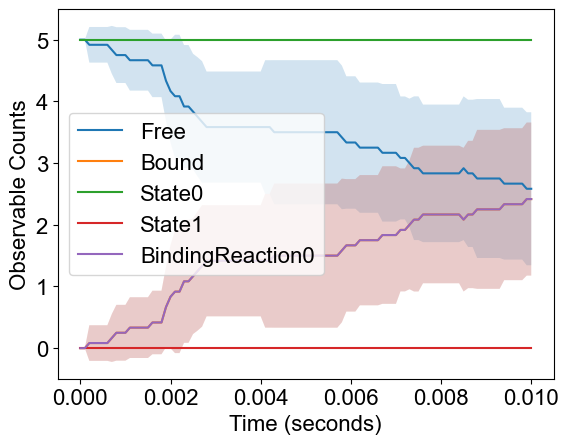

In [5]:
path = data_file_finder(search_directory, ['data'], 'Site_2_0')
column_info(path)
Plotter.stdevPlots(path)

Sites:
0:  R of R
1:  L of R
2:  Anchor of R
3:  A of Adapter
4:  L of Adapter

List of indicies:
[0, 1, 2, 3, 4]


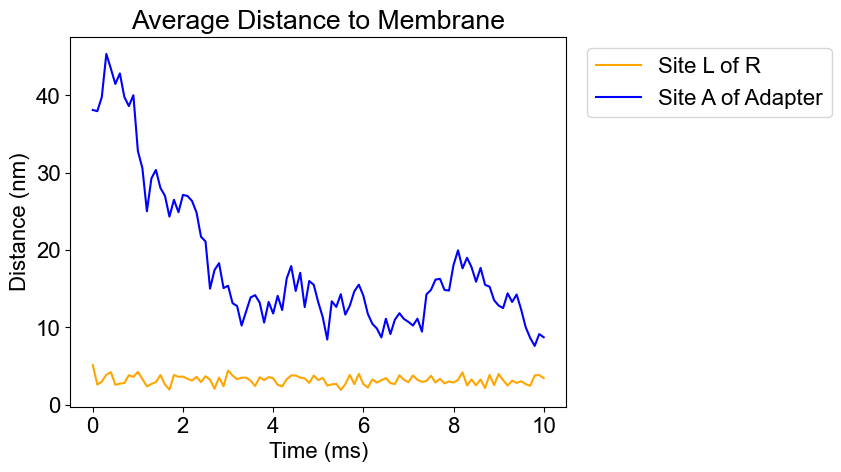

In [15]:
Average_z_pos(search_directory, indicies=[1,3], run_num=10, verbose=True, legend_right=True, list_sites=True)